<a href="https://colab.research.google.com/github/alekivetz/CMPT-2400/blob/main/NPRI_EDA_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Required Libraries & Load the Dataset


Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [3]:
# Load the dataset
xls = pd.ExcelFile('NPRI_2000-2022.xlsx')

# Dataset contains multiple sheets
print(xls.sheet_names)

# Set pandas to display all columns and prevent line breaks in columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

['Releases 2000-2020', 'Disposals and Transfers 00-20', 'Comments']


The main factor of our prediction model will be pollutant releases over time, so we will focus on the releases sheet

In [4]:
df_original = pd.read_excel(xls, 'Releases 2000-2020')

Create a copy to avoid modifying original

In [5]:
df = df_original.copy()

Examine columns, remove French from headings for readability, remove blank spaces after release column names

In [6]:
df.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_d’estimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
       'Release to Air - Road dust  ', 'Release to Air - Spills ',
       'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Leaks',
       'Releases to Land - Other ', 'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills ',
       'Sum of release to all media (<1tonne)'],
      dtype='object')

In [7]:
# Rename all columns with French headings
df = df.rename(columns={
    'Reporting_Year / Année' : 'Reporting_Year',
    'NPRI_ID / No_INRP' : 'NPRI_ID',
    'Company_Name / Dénomination_sociale_de_l\'entreprise' : 'Company_Name',
    'Facility_Name / Installation' : 'Facility_Name',
    'NAICS / Code_SCIAN' : 'NAICS',
    'NAICS Title / Titre Code_SCIAN' : 'NAICS_Title',
    'CAS_Number / No_CAS' : 'CAS_Number',
    'Substance Name (English) / Nom de substance (Anglais)' : 'Substance_Name',
    'PROVINCE' : 'Province',
    'Units / Unités' : 'Units',
    'Estimation_Method / Méthode_d’estimation' : 'Estimation_Method',
    'Value / Valeur' : 'Value',
    'Release to Air - Other Non-Point ' : 'Release to Air - Other Non-Point',
    'Release to Air - Road dust  ' : 'Release to Air - Road dust',
    'Release to Air - Spills ' : 'Release to Air - Spills',
    'Release to Air - Stack / Point  ' : 'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling ' : 'Release to Air - Storage / Handling',
    'Releases to Land - Other ' : 'Releases to Land - Other',
    'Releases to Land - Spills ' : 'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges ' : 'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Spills ' : 'Releases to Water Bodies - Spills'

})

df.head()

,Reporting_Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,City,Latitude,Longitude,CAS_Number,Substance_Name,Units,Estimation_Method,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,10049-04-4,Chlorine dioxide,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-56-1,Methanol,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-66-3,Chloroform,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,75-07-0,Acetaldehyde,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7647-01-0,Hydrochloric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Function to extract and display basic info about the dataset

In [8]:
def dataframe_summary(dataframe):
  print('Dataset Summary')
  print('-' * 106)

  # Shape
  print(f'Number of rows: {df.shape[0]}')
  print(f'Number of columns: {df.shape[1]}')

  print('\nColumn Overview')
  print('-' * 106)

  # Data types, missing value counts, and unique values
  summary = pd.DataFrame({
      'Data Type': df.dtypes,
      'Missing Values': df.isnull().sum(),
      'Missing Values (%)': round(df.isnull().sum() / len(df) * 100, 2),
      'Unique Values': df.nunique()
  })

  print(summary)
  print('-' * 106)

# Call function for our dataframe
dataframe_summary(df)

Dataset Summary
----------------------------------------------------------------------------------------------------------
Number of rows: 737516
Number of columns: 28

Column Overview
----------------------------------------------------------------------------------------------------------
                                             Data Type  Missing Values  Missing Values (%)  Unique Values
Reporting_Year                                   int64               0                0.00             23
NPRI_ID                                          int64               0                0.00          21868
Number of employees                             object             616                0.08           1884
Company_Name                                    object               0                0.00           9859
Facility_Name                                   object            1176                0.16          32102
NAICS                                            int64               0  

**Column Descriptions**

Reporting_Year: The year in which the environmental data was reported by the company or facility.

NPRI_ID: A unique identifier assigned to each facility or company reporting data in the NPRI.

Number of employees: The number of employees working at the company or facility.

Company_Name: The name of the company reporting environmental data.

Facility_Name: The name of the facility where the environmental releases are taking place.

NAICS: The North American Industry Classification System (NAICS) code that represents the industry in which the company or facility operates.

NAICS Title: The title or description of the NAICS code.

City: The city in which the company or facility is located.

Latitude: The latitude coordinate of the facility's location.

Longitude: The longitude coordinate of the facility's location.

CAS_Number: The Chemical Abstracts Service (CAS) registry number for the substance being released, used for identifying chemicals.

Substance Name: The name of the substance being released.

Units: The units used for measuring how much of the substance is released.

Estimation_Method: The method used to estimate the quantity of the release or disposal of the substance.

Release to Air - Fugitive: Amount of the substance released into the air from fugitive sources (e.g., leaks, vents).

Release to Air - Other Non-Point: Releases to air from other non-point sources (e.g., surface area emissions).

Release to Air - Road Dust: Amount of the substance released into the air due to road dust.

Release to Air - Spills: Amount of the substance released into the air as a result of spills.

Release to Air - Stack / Point: Amount of the substance released into the air from stack or point sources (e.g., smokestacks, chimneys).

Release to Air - Storage / Handling: Amount of the substance released into the air due to the storage or handling of materials.

Releases to Land - Leaks: Amount of the substance released to land due to leaks from a facility or equipment.

Releases to Land - Other: Releases to land that do not fall under specific categories like leaks or spills.

Releases to Land - Spills: Amount of the substance released to land from spills.

Releases to Water Bodies - Direct Discharges: Releases directly discharged into water bodies, such as rivers, lakes, or streams.

Releases to Water Bodies - Leaks: Releases to water bodies from leaks.

Releases to Water Bodies - Spills: Amount of the substance released into water bodies due to spills.

Sum of release to all media (<1tonne): A summary of all releases to air, land, and water, with a value of less than 1 tonne.

****
Based on the column descriptions above, our relevant columns will include Reporting_Year, NAICS, and the release columns.

# 2. Outliers

In [ ]:
# List of all release columns
release_columns = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point',
    'Release to Air - Road dust',
    'Release to Air - Spills',
    'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling',
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills',
    'Sum of release to all media (<1tonne)'
]

# Release columns grouped
air_columns = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point',
    'Release to Air - Road dust',
    'Release to Air - Spills',
    'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling'
]

land_columns = [
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills'
]

water_columns = [
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills'
]


We will create histograms to see which columns have potential outliers.

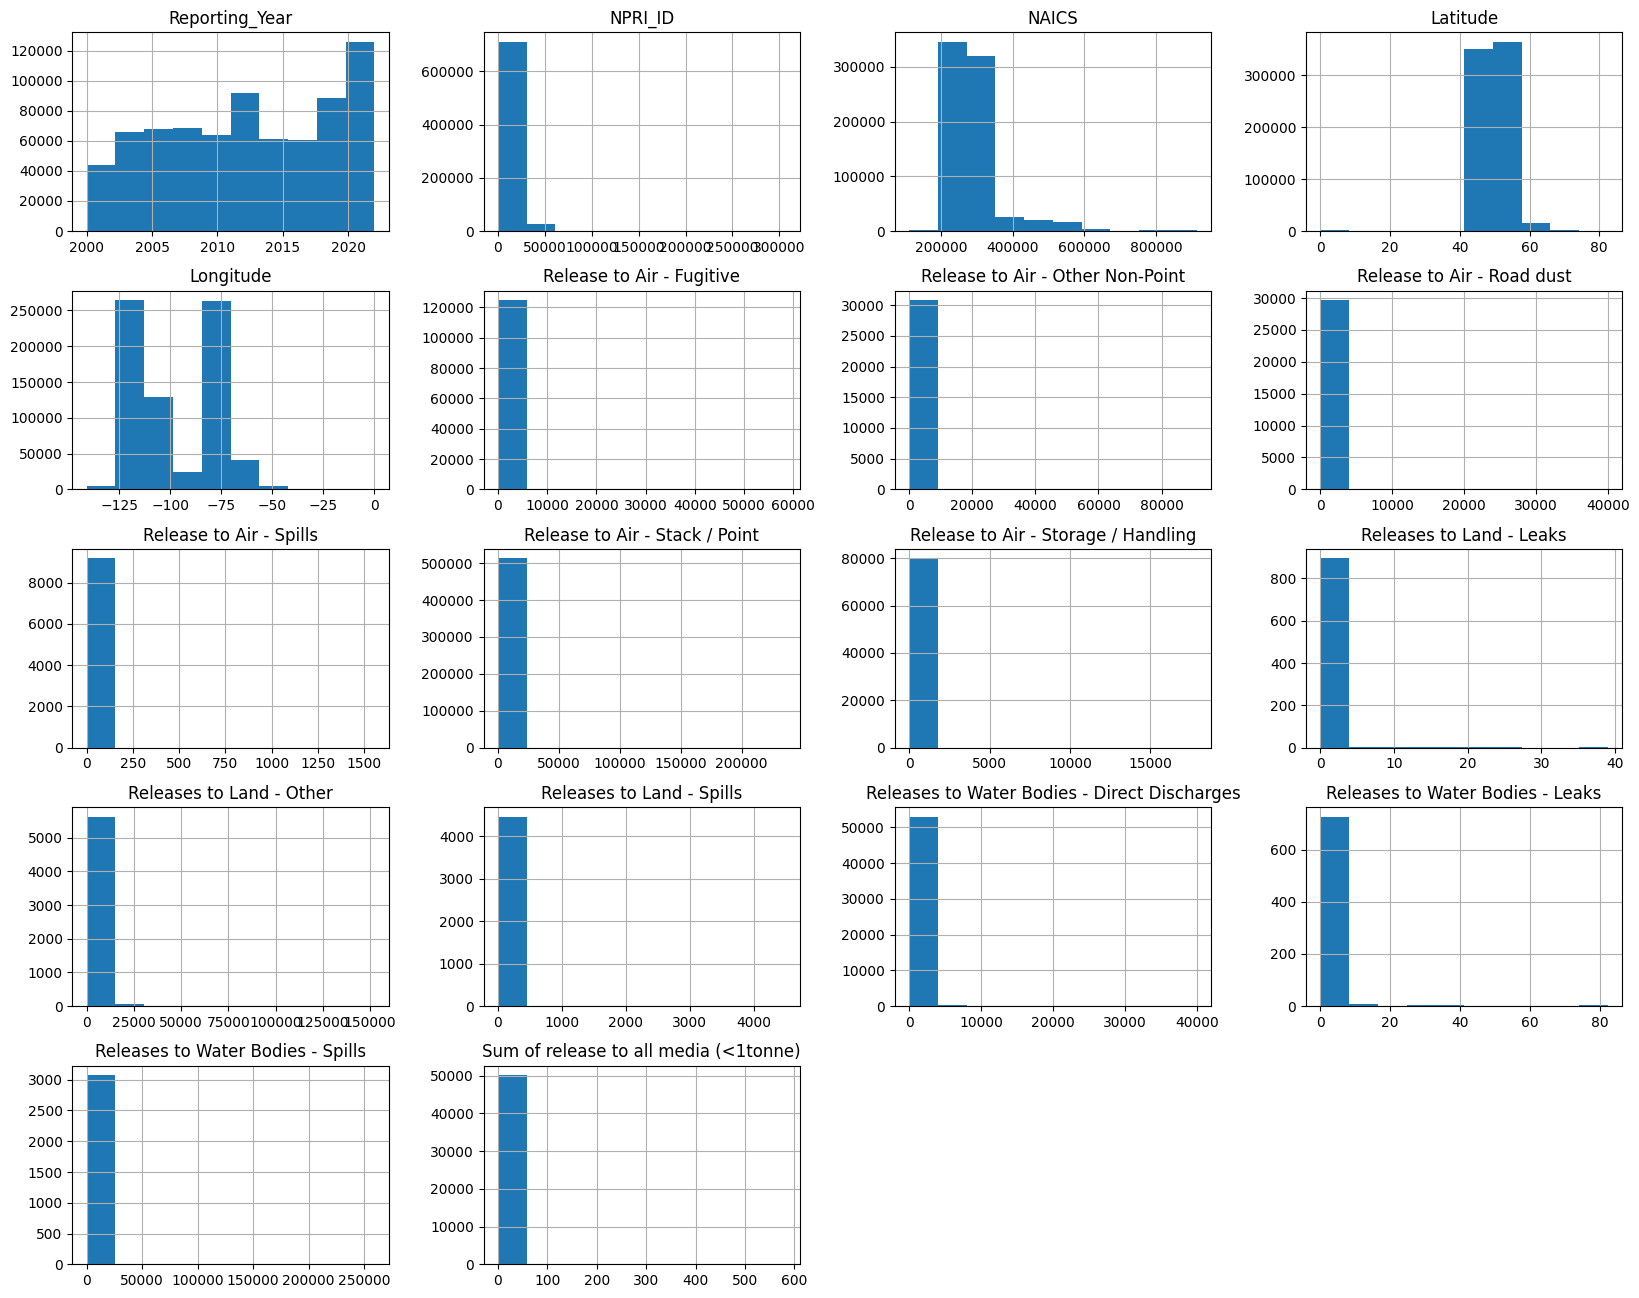

In [10]:
# All histograms

df.hist(figsize=(20, 16))
plt.show()

In [16]:
df.describe()

,Reporting_Year,NPRI_ID,NAICS,Latitude,Longitude,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
count,737516.000000,737516.000000,737516.000000,733434.000000,733434.000000,125032.000000,30880.000000,29861.000000,9181.000000,513282.000000,80004.000000,910.000000,5668.000000,4470.000000,53188.000000,742.000000,3080.000000,50185.000000
mean,2012.267601,11248.268386,289175.551820,49.644636,-97.375436,61.156824,91.455034,117.236013,1.742604,144.203321,23.462437,0.356315,515.614162,5.090716,79.052084,0.710053,174.901856,0.141082
std,6.400156,9352.868266,94788.542197,5.155658,20.184399,797.572502,1628.905004,856.012131,22.223163,2014.861249,218.305058,2.586239,3181.280880,93.378082,577.693253,5.332891,5342.398935,2.606306
min,2000.000000,1.000000,111120.000000,0.000000,-140.883600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,3775.000000,211113.000000,45.431000,-114.767700,0.051000,0.013000,0.505400,0.000000,0.429000,0.015000,0.000000,0.001000,0.000000,0.060000,0.000000,0.000000,0.001700
50%,2012.000000,7114.000000,312140.000000,49.795100,-104.630100,0.796000,0.490000,3.561900,0.000300,4.037595,0.358000,0.000000,5.000000,0.002000,2.068000,0.000000,0.087900,0.023700
75%,2018.000000,18093.000000,327120.000000,53.508500,-79.540060,7.582000,7.458500,22.000000,0.040000,37.389000,3.953000,0.000000,47.000000,0.030000,20.578400,0.000000,1.398350,0.150000
max,2022.000000,306556.000000,913910.000000,82.498758,0.000000,58433.900000,91138.200000,39992.961045,1554.400000,235907.000000,17883.110000,39.058000,152270.000000,4500.100000,39991.000000,82.400000,259050.000000,582.000000


Statistics for numerical columns

In [19]:
# Generate statistics for each numerical column, with potential outliers

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print('-' * 60)
    print(f"Statistics for {col}:\n")

    # Calculate quartiles and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    print(f'Mean: {df[col].mean()}')
    print(f'Standard Deviation: {df[col].std()}')
    print(f'Minimum: {df[col].min()}')
    print(f'Q1: {Q1}')
    print(f'Median: {df[col].median()}')
    print(f'Q3: {Q3}')
    print(f'Maximum: {df[col].max()}')

    print(f'\nUpper Limit: {upper_limit}')
    print(f'Lower Limit: {lower_limit}')

    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    percentage = len(outliers) / df[col].count() * 100

    print(f'\nOutliers in {col}: {len(outliers)}, which represents {percentage:.2f}% of data points.\n')


------------------------------------------------------------
Statistics for Reporting_Year:

Mean: 2012.2676009740806
Standard Deviation: 6.400155701643681
Minimum: 2000
Q1: 2007.0
Median: 2012.0
Q3: 2018.0
Maximum: 2022

Upper Limit: 2034.5
Lower Limit: 1990.5

Outliers in Reporting_Year: 0, which represents 0.00% of data points.

------------------------------------------------------------
Statistics for NPRI_ID:

Mean: 11248.268386041795
Standard Deviation: 9352.86826615425
Minimum: 1
Q1: 3775.0
Median: 7114.0
Q3: 18093.0
Maximum: 306556

Upper Limit: 39570.0
Lower Limit: -17702.0

Outliers in NPRI_ID: 2, which represents 0.00% of data points.

------------------------------------------------------------
Statistics for NAICS:

Mean: 289175.5518198927
Standard Deviation: 94788.54219703189
Minimum: 111120
Q1: 211113.0
Median: 312140.0
Q3: 327120.0
Maximum: 913910

Upper Limit: 501130.5
Lower Limit: 37102.5

Outliers in NAICS: 24100, which represents 3.27% of data points.

------------

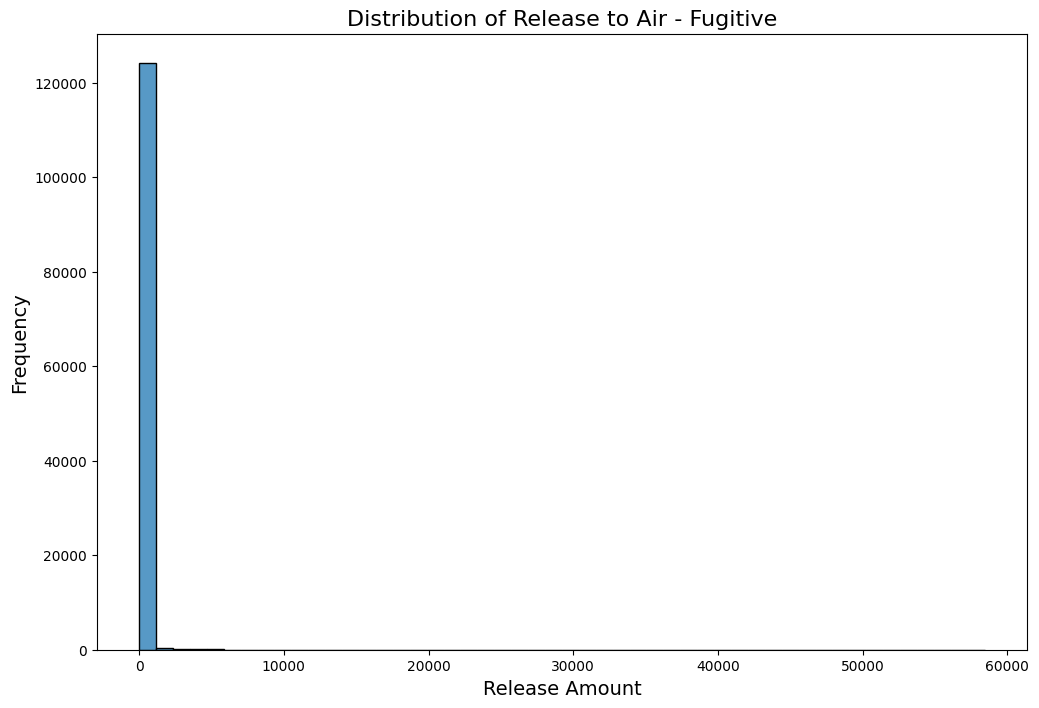

In [33]:
# Release to air fugitive histogram with outliers

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Release to Air - Fugitive', bins=50, stat='count')

plt.title('Distribution of Release to Air - Fugitive', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

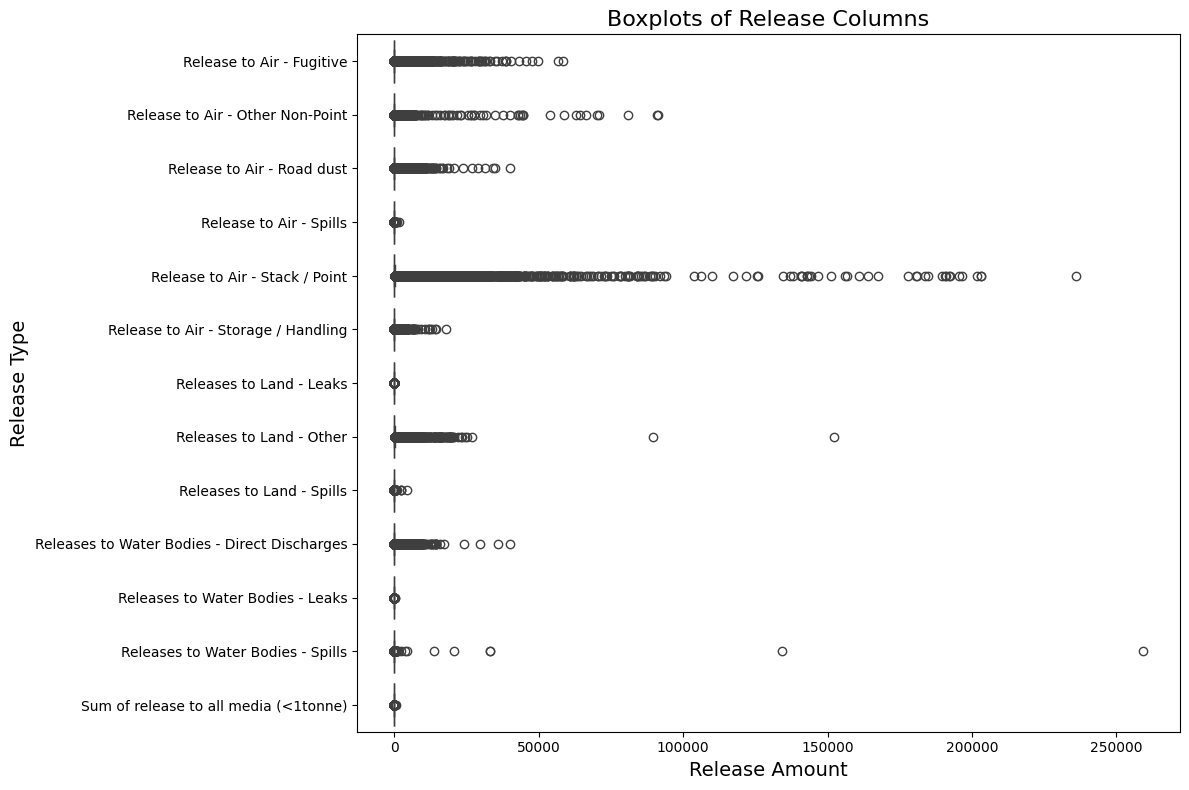

In [ ]:
# Create boxplots for all release columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[release_columns], orient='h')
plt.title('Boxplots of Release Columns', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()

# 3. Visualizations

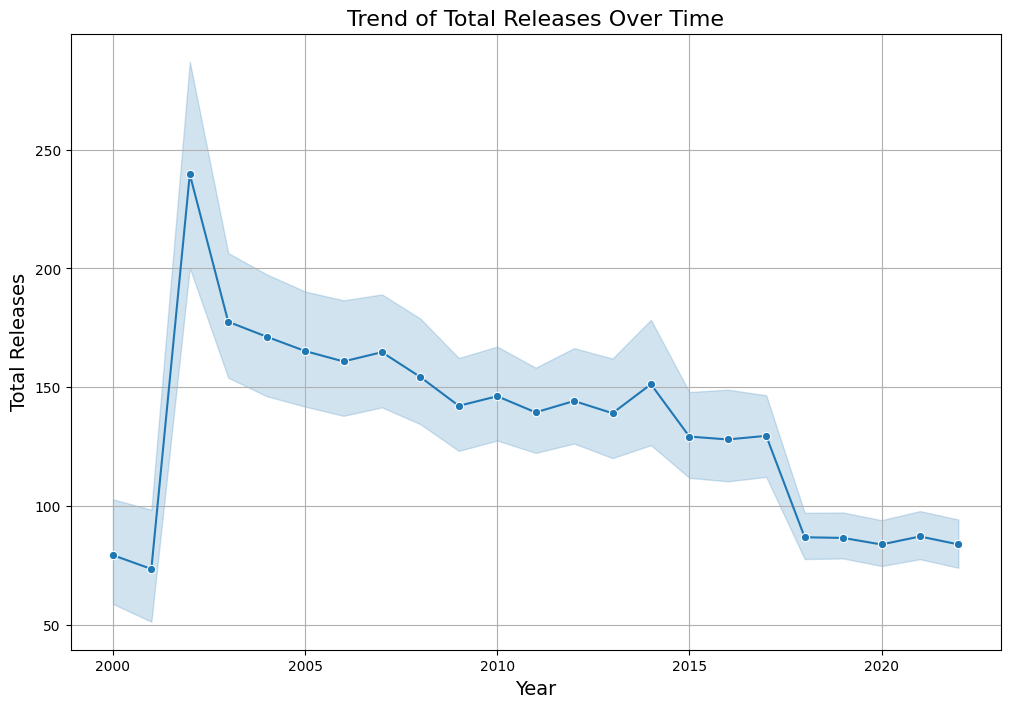

In [ ]:
# Releases trend over time

df['Total_Releases'] = df[release_columns].sum(axis=1)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Reporting_Year', y='Total_Releases', marker='o')
plt.title('Trend of Total Releases Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Releases', fontsize=14)
plt.grid(True)
plt.show()

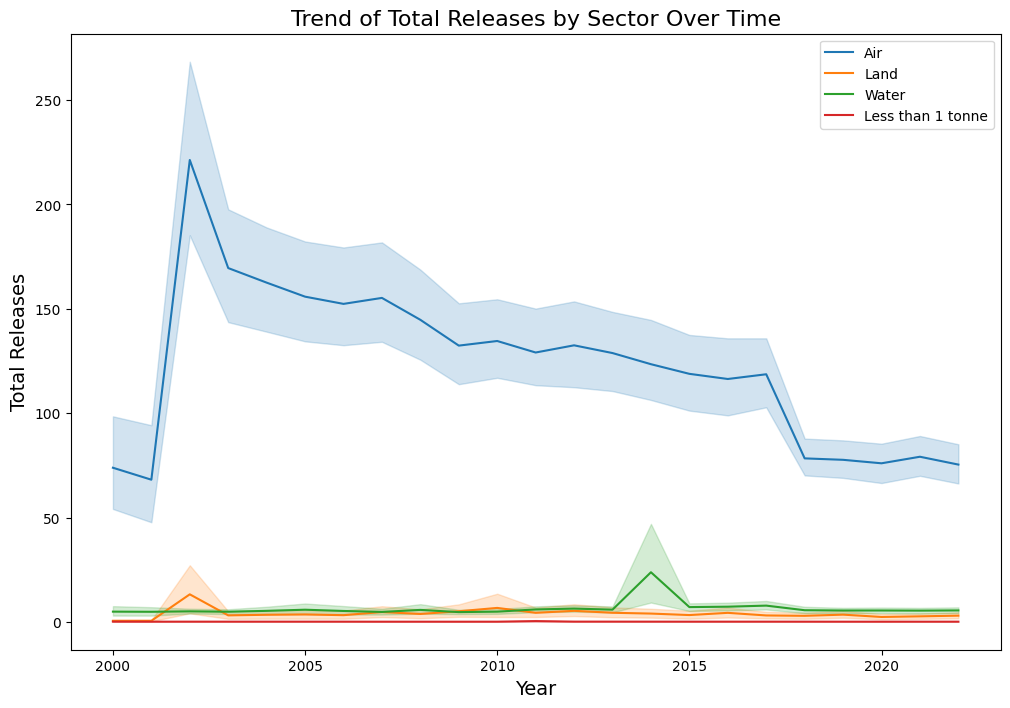

In [ ]:
# Releases trends by sector
df['Total_Air_Releases'] = df[air_columns].sum(axis=1)
df['Total_Land_Releases'] = df[land_columns].sum(axis=1)
df['Total_Water_Releases'] = df[water_columns].sum(axis=1)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Reporting_Year', y='Total_Air_Releases', label='Air')
sns.lineplot(data=df, x='Reporting_Year', y='Total_Land_Releases', label='Land')
sns.lineplot(data=df, x='Reporting_Year', y='Total_Water_Releases', label='Water')
sns.lineplot(data=df, x='Reporting_Year', y='Sum of release to all media (<1tonne)', label='Less than 1 tonne')
plt.title('Trend of Total Releases by Sector Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Releases', fontsize=14)
plt.legend()
plt.show()